<a href="https://colab.research.google.com/github/Ximena5745/Developer/blob/main/ModeloRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from IPython.display import Audio
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Cargar los datos desde un archivo CSV
full_data = '/content/drive/MyDrive/full_data3.csv'
emotion_df = pd.read_csv(full_data)

# Preparar los datos
X = emotion_df.drop(columns=['Registro', 'Emocion', 'Path'])
y = emotion_df['Emocion']

# Convertir Chroma STFT y MFCC a columnas numéricas
X_chroma = pd.DataFrame(X['Chroma STFT'].tolist(), index=X.index)
X_mfcc = pd.DataFrame(X['MFCC'].tolist(), index=X.index)

# Combinar y limpiar los datos
X = X.drop(columns=['Chroma STFT', 'MFCC'], errors='ignore')
X = pd.concat([X, X_chroma, X_mfcc], axis=1)

# Convertir todo a numérico, forzando errores a NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Rellenar los valores NaN con la media de cada columna
X.fillna(X.mean(), inplace=True)

# Convertir los nombres de las columnas a cadenas
X.columns = X.columns.astype(str)

# Verificar que todos los datos son numéricos
print("Tipos de datos en X antes de la normalización:\n", X.dtypes)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tipos de datos en X antes de la normalización:
 Frecuencia de muestreo           int64
Duración (s)                   float64
Frecuencia Fundamental (Hz)    float64
Amplitud Máxima                float64
Amplitud Mínima                float64
Tasa de Cruce por Cero         float64
Valor RMS                      float64
Entropía Espectral             float64
Formante F1 (Hz)               float64
Formante F2 (Hz)               float64
HNR (Harmonicity)              float64
Mel espectogramas              float64
Frecuencia Centroidal          float64
Rolloff                        float64
Bandwidth                      float64
Flatness                       float64
0                              float64
0                              float64
dtype: object


In [14]:
# Normalizar las características usando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [15]:
# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

     Predicted Labels Actual Labels
1350          neutral         angry
1434         surprise      surprise
2500              sad           sad
1128            happy      surprise
4144              sad           sad
3883         surprise      surprise
3624            happy         happy
794           neutral           sad
298           disgust       disgust
184           neutral       neutral
642             angry       disgust
3331          disgust       disgust
1613            angry         angry
3134             fear          fear
3378          disgust       disgust
2793         surprise      surprise
3317          disgust       disgust
2067             fear          fear
862           neutral       neutral
843           neutral       neutral
270             angry         happy
3159             fear          fear
4110              sad           sad
2922            angry         angry
2358            happy         happy
2442              sad           sad
1088          neutral       

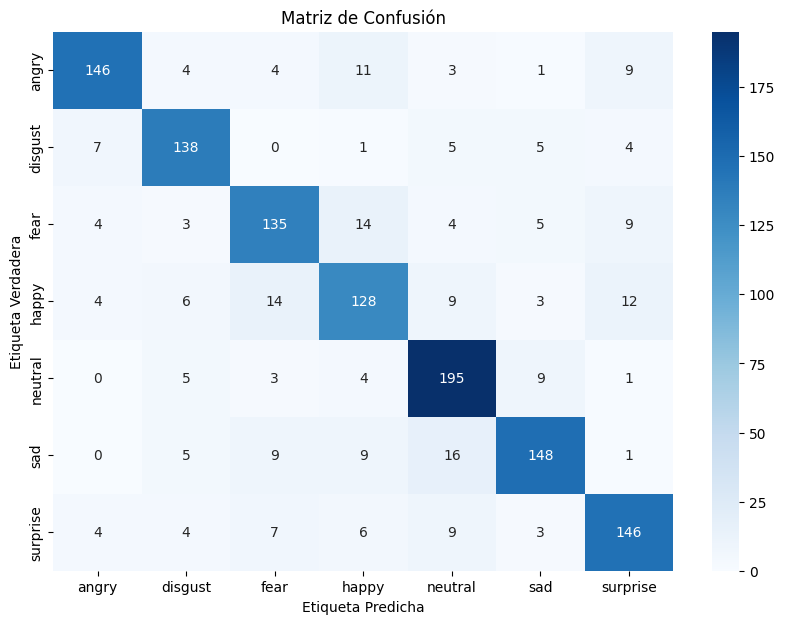

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir sobre los datos de prueba usando el modelo Random Forest
y_pred0 = model.predict(X_test)  # El modelo Random Forest predice directamente las etiquetas
y_test0 = y_test  # Etiquetas reales de prueba

# Comprobar las predicciones en un DataFrame
df0 = pd.DataFrame({
    'Predicted Labels': y_pred0,  # Etiquetas predichas por el modelo
    'Actual Labels': y_test0      # Etiquetas reales
})

# Mostrar las primeras 50 filas de las predicciones
print(df0.head(50))

# Comprobar la precisión del modelo
accuracy = accuracy_score(y_test0, y_pred0)
print(f"Precisión del modelo: {accuracy:.2f}")

# Generar un reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test0, y_pred0))

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test0, y_pred0)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()